In [1]:
import gdown
import os
import torch
import src
from notebooks.notebook_utils import *

# Noiseless model

In [ ]:
model_path = "boolformer_noiseless.pt" 
if not os.path.exists(model_path):
    url = "https://drive.google.com/uc?id=1cULlE16yKBqUZMMGv7CC5fgHXXJ7OQQQ"
    gdown.download(url, model_path, quiet=False)
boolformer = torch.load(model_path)
env = boolformer.env
print("Loaded pretrained model")

# Noisy model

In [2]:
model_path = "boolformer_noisy.pt" 
if not os.path.exists(model_path):
    url = "https://drive.google.com/uc?id=1IFSc_sHfiTckMy-cwggvVMBH1YgXas8G"
    gdown.download(url, model_path, quiet=False)
boolformer = torch.load(model_path)
env = boolformer.env
print("Loaded pretrained model")

Loaded pretrained model


Problem: TOX


  0%|          | 0/5 [00:00<?, ?it/s]

Best f1: 0.335, acc: 0.722, complexity: 2
[$\mathrm{not}$ [$\mathrm{or}$ [$bit49$ ][$bit114$ ]]]


~(bit114 | bit49)

 20%|██        | 1/5 [00:01<00:05,  1.41s/it]

Best f1: 0.389, acc: 0.780, complexity: 5
[$\mathrm{not}$ [$\mathrm{or}$ [$bit49$ ][$\mathrm{not}$ [$\mathrm{or}$ [$bit65$ ][$bit86$ ][$bit90$ ]]]]]


~(bit49 | ~(bit65 | bit86 | bit90))

 40%|████      | 2/5 [00:03<00:05,  1.98s/it]

Best f1: 0.425, acc: 0.854, complexity: 7
[$\mathrm{not}$ [$\mathrm{or}$ [$bit49$ ][$\mathrm{not}$ [$\mathrm{and}$ [$\mathrm{or}$ [$bit90$ ][$bit125$ ]][$\mathrm{or}$ [$bit118$ ][$bit133$ ][$bit132$ ]]]]]]


~(bit49 | ~((bit125 | bit90) & (bit118 | bit132 | bit133)))

 60%|██████    | 3/5 [00:07<00:05,  2.70s/it]

Best f1: 0.400, acc: 0.784, complexity: 5
[$\mathrm{not}$ [$\mathrm{or}$ [$bit49$ ][$\mathrm{not}$ [$\mathrm{or}$ [$bit133$ ][$bit122$ ][$bit126$ ]]]]]


~(bit49 | ~(bit122 | bit126 | bit133))

 80%|████████  | 4/5 [00:11<00:03,  3.24s/it]

Best f1: 0.419, acc: 0.800, complexity: 5
[$\mathrm{not}$ [$\mathrm{or}$ [$bit49$ ][$\mathrm{not}$ [$\mathrm{or}$ [$bit89$ ][$bit86$ ][$bit133$ ]]]]]


~(bit49 | ~(bit133 | bit86 | bit89))

100%|██████████| 5/5 [00:17<00:00,  3.41s/it]

Problem: BBB



  0%|          | 0/5 [00:00<?, ?it/s]

Best f1: 0.901, acc: 0.840, complexity: 3
[$\mathrm{not}$ [$\mathrm{or}$ [$bit28$ ][$\mathrm{and}$ [$bit123$ ][$bit97$ ]]]]


~(bit28 | (bit123 & bit97))

 20%|██        | 1/5 [00:01<00:06,  1.51s/it]

Best f1: 0.846, acc: 0.776, complexity: 6
[$\mathrm{or}$ [$\mathrm{not}$ [$\mathrm{or}$ [$bit139$ ][$bit131$ ]]][$\mathrm{and}$ [$bit112$ ][$\mathrm{not}$ [$\mathrm{and}$ [$bit139$ ][$bit97$ ]]]]]


~(bit131 | bit139) | (bit112 & ~(bit139 & bit97))

 40%|████      | 2/5 [00:03<00:06,  2.04s/it]

Best f1: 0.859, acc: 0.790, complexity: 3
[$\mathrm{not}$ [$\mathrm{and}$ [$bit131$ ][$\mathrm{or}$ [$bit139$ ][$bit105$ ]]]]


~(bit131 & (bit105 | bit139))

 60%|██████    | 3/5 [00:07<00:05,  2.72s/it]

Best f1: 0.857, acc: 0.794, complexity: 8
[$\mathrm{or}$ [$\mathrm{not}$ [$bit131$ ]][$\mathrm{and}$ [$\mathrm{not}$ [$bit79$ ]][$bit136$ ][$\mathrm{not}$ [$\mathrm{and}$ [$bit95$ ][$\mathrm{or}$ [$bit131$ ][$bit79$ ]]]]]]


~bit131 | (bit136 & ~bit79 & ~(bit95 & (bit131 | bit79)))

 80%|████████  | 4/5 [00:12<00:03,  3.47s/it]

Best f1: 0.871, acc: 0.814, complexity: 8
[$\mathrm{or}$ [$\mathrm{not}$ [$\mathrm{or}$ [$bit131$ ][$bit108$ ]]][$\mathrm{and}$ [$\mathrm{or}$ [$\mathrm{not}$ [$bit131$ ]][$bit108$ ]][$\mathrm{not}$ [$\mathrm{and}$ [$bit95$ ][$bit146$ ]]]]]


~(bit108 | bit131) | (~(bit146 & bit95) & (bit108 | ~bit131))

100%|██████████| 5/5 [00:18<00:00,  3.64s/it]


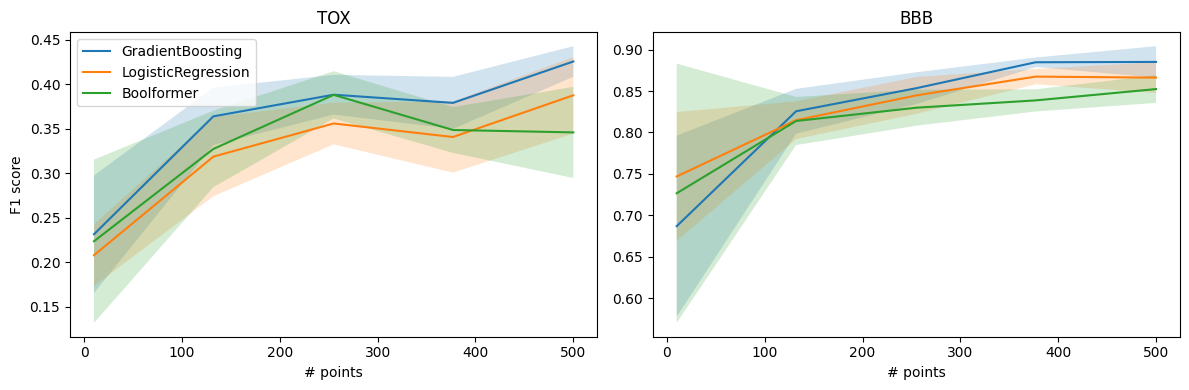

In [3]:
from notebook_utils import *

num_points = 100
beam_size  = 20
verbose = True
num_points_arr = np.linspace(10,500,5).astype(int)
#num_points_arr = [1,10,30]
problems = ['TOX','BBB']
fig, axarr = plt.subplots(1,len(problems),figsize=(6*len(problems),4))
for ip, problem in enumerate(problems):
    print('Problem:', problem, flush=True)
    accs, f1s, accs_var, f1s_var = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)
    for num_points in tqdm.tqdm(num_points_arr):
        accs_tmp, f1s_tmp, trees = defaultdict(list), defaultdict(list), []
        for seed in range(5):
            acc, f1, tree = run_drug_discovery(boolformer, data_path="/data/rcp/boolean/notebooks", problem=problem, num_points=num_points, num_test_points=500, num_features=env.params.max_inactive_vars, beam_size=beam_size, verbose=False, balance=True)
            for k, v in acc.items(): accs_tmp[k].append(v)
            for k, v in f1.items(): f1s_tmp[k].append(v)
            trees.append(tree)
        # tree with best acc
        idx = np.argmax(f1s_tmp['Boolformer'])
        best_tree = trees[idx]
        best_f1, best_acc = f1s_tmp['Boolformer'][idx], accs_tmp['Boolformer'][idx]
        if verbose:
            print(f'Best f1: {best_f1:.3f}, acc: {best_acc:.3f}, complexity: {best_tree.get_n_ops()}')
            #print(f"[.${problem}$ "+tree_to_latex(best_tree)+"]", flush=True)
            print(tree_to_latex(best_tree), flush=True)
            display(env.simplifier.get_simple_infix(best_tree, simplify_form='basic'))
        for k, v in accs_tmp.items(): 
            accs[k].append(np.mean(v))
            accs_var[k].append(np.std(v))
        for k, v in f1s_tmp.items(): 
            f1s[k].append(np.mean(v))
            f1s_var[k].append(np.std(v))
        
    for k, v in f1s.items():
        axarr[ip].    errorbar(num_points_arr, v,  label=k.replace('Classifier', ''))
        axarr[ip].fill_between(num_points_arr, np.array(v)-np.array(f1s_var[k]), np.array(v)+np.array(f1s_var[k]), alpha=0.2)
    axarr[ip].set_xlabel('# points')
    axarr[ip].set_title(problem)

axarr[0].set_ylabel('F1 score')
axarr[0].legend()
plt.tight_layout()
#plt.savefig(savedir+'drug_discovery_maccs.pdf')
plt.show()

